# WeRateDogs Project - Data Wrangling and Analysis

## Table of Contents
<ul>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#visual">Visual Assessment</a></li>
<li><a href="#prog">Programmatic Assessment</a></li>
<li><a href="#quality">List of Quality Issues</a></li>
<li><a href="#tidy">List of Tidiness Issues</a></li>
<li><a href="#clean">Data Cleaning</a></li>
<li><a href="#q1">Quality Issue 1</a></li>
<li><a href="#q2">Quality Issue 2</a></li>
<li><a href="#q3">Quality Issue 3</a></li>
<li><a href="#q4">Quality Issue 4</a></li>
<li><a href="#q5">Quality Issue 5</a></li>
<li><a href="#q6">Quality Issue 6</a></li>
<li><a href="#q7">Quality Issue 7</a></li>
<li><a href="#q8">Quality Issue 8</a></li>
<li><a href="#q9">Quality Issue 9</a></li>
<li><a href="#q10">Quality Issue 10</a></li>
<li><a href="#q11">Quality Issue 11</a></li>
<li><a href="#t1">Tidiness Issue 1</a></li>
<li><a href="#t2">Tidiness Issue 2</a></li>
<li><a href="#t3">Tidiness Issue 3</a></li>
<li><a href="#t4">Tidiness Issue 4</a></li>
<li><a href="#t5">Tidiness Issue 5</a></li>
<li><a href="#store">Storing Data</a></li>
<li><a href="#analyze">Analysis and Visualization</a></li>
<li><a href="#insight">Insights</a></li>
<li><a href="#visual">Viz</a></li>
</ul>

<a id='gathering'></a>
## Data Gathering

In the following cells, all data for the project will be gathered and loaded into the notebook for assessment.


1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)
2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)
3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [1]:
import pandas as pd
import numpy as np
import tweepy
import requests 
import os
import io
import json
from timeit import default_timer as timer

In [2]:
#The (twitter_archive_enhanced.csv) file has been downloaded and uploaded into the working directory
# Next it is read into the dataframe below

df_archive = pd.read_csv('twitter_archive_enhanced.csv')

Next we use the Requests library to download the tweet image prediction programmatically (image_predictions.tsv)

In [3]:
# code block below downloads the desired file from the provided url

folder_name = 'project-2' #creates a folder to store the file
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    response = requests.get(url)
    file.write(response.content) 

In [4]:
# the downloaded file is read into df_images dataframe

df_images = pd.read_table("project-2/image-predictions.tsv")

Next step in gathering the data is to use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
consumer_key = 'xxxxxxxxxxxxxxxxxxxxxx'
consumer_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
access_token = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
access_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# JSON data on retrieved tweets will be saved in a new line as a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except Exception as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [7]:
# This reads the tweet_json.txt file into the dataframe, to complete the gathering requirements 

df_extra_archive = pd.read_json('tweet_json.txt',  lines = True)

<a id='assess'></a>
## Assessing Data


In this section, we will try to identify certain data quality and tidiness issues plauging the data we loaded into the notebook above. 

<a id='visual'></a>
### Visual Assessment

We will display the three dataframes and visually inspect them to see what quality and tidiness issues are readily visible, then each will be noted down for the cleaning stage.

In [8]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
df_extra_archive

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2323,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2324,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2325,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [10]:
df_images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


<a id='prog'></a>
### Programmatic Assessment 

In the following cells, we will apply pandas functions and menthods for a deeper assessment of our datasets.

A look at ``df_archive`` first.

In [11]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
df_archive.tweet_id.duplicated().sum()

0

In [13]:
# Information in project motivation mentioned that rating denominator is almost always 10
# here we check to ensure our data complies

df_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [14]:
# Let's find the index of all rating denominator not equal to 10, so we can use it to 

rating_denominator_less_than_ten = df_archive[df_archive['rating_denominator'] != 10].index
rating_denominator_less_than_ten

Int64Index([ 313,  342,  433,  516,  784,  902, 1068, 1120, 1165, 1202, 1228,
            1254, 1274, 1351, 1433, 1598, 1634, 1635, 1662, 1663, 1779, 1843,
            2335],
           dtype='int64')

In [15]:
# We will pay close attention to all denominators that are not in the multiples of 10.
# However, given the unique rating system employed by WeRateDog, we will check the tweet associated with each of these
# rating denominator above 10

print(df_archive['text'][313]) # Comment about a rating
print(df_archive['text'][342]) # No rating
print(df_archive['text'][433])
print(df_archive['text'][516]) # No rating
print(df_archive['text'][784]) # A retweet
print(df_archive['text'][902]) 
print(df_archive['text'][1068]) # Actual rating 14/10
print(df_archive['text'][1120]) 
print(df_archive['text'][1165]) # Comment about a rating
print(df_archive['text'][1202])
print(df_archive['text'][1228]) 
print(df_archive['text'][1254]) 
print(df_archive['text'][1274]) 
print(df_archive['text'][1351]) 
print(df_archive['text'][1433])
print(df_archive['text'][1598]) # Comment about rating
print(df_archive['text'][1634])
print(df_archive['text'][1635]) 
print(df_archive['text'][1662]) # Actual rating 10/10
print(df_archive['text'][1663]) # Comment about a rating
print(df_archive['text'][1779]) 
print(df_archive['text'][1843]) 
print(df_archive['text'][2335]) # Actual rating 9/10

# During cleaning, we are only going to work on ['2335','1662','1165' and '1068'], the rest will be deleted
# Indexes above not commented on are in multiples of 10 and have been confirmed below to be ratings to multiple dogs.

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
@docmisterio account started on 11/15/15
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
This is Bluebert. He just saw that both #Fin

In [16]:
# Information above shows that the denominators in multiples of 10 are associated with multiple dogs.
# Below we ascertain the exact index to work on during cleaning

print(df_archive.loc[df_archive.rating_denominator == 15, 'text']) 
print(df_archive.loc[df_archive.rating_denominator == 0, 'text']) 
print(df_archive.loc[df_archive.rating_denominator == 16, 'text']) 
print(df_archive.loc[df_archive.rating_denominator == 2, 'text'])
print(df_archive.loc[df_archive.rating_denominator == 7, 'text'])
print(df_archive.loc[df_archive.rating_denominator == 11, 'text'])

342    @docmisterio account started on 11/15/15
Name: text, dtype: object
313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object
1663    I'm aware that I could've said 20/16, but here...
Name: text, dtype: object
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object
516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object
784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object


In [17]:
df_archive['rating_numerator'].value_counts().sort_values()

144       1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
26        1
99        1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
204       1
17        1
88        1
80        1
84        1
0         2
420       2
15        2
75        2
1         9
2         9
4        17
3        19
6        32
5        37
14       54
7        55
8       102
9       158
13      351
10      461
11      464
12      558
Name: rating_numerator, dtype: int64

In [18]:
# Below we look at some outlying numerators to ensure they are actual figures
print(df_archive.loc[df_archive.rating_numerator == 960, 'text']) 
print(df_archive.loc[df_archive.rating_numerator == 1776, 'text']) 
print(df_archive.loc[df_archive.rating_numerator == 420, 'text']) 
print(df_archive.loc[df_archive.rating_numerator == 666, 'text']) 
print(df_archive.loc[df_archive.rating_numerator == 165, 'text']) 
print(df_archive.loc[df_archive.rating_numerator == 144, 'text']) 
print(df_archive.loc[df_archive.rating_numerator == 143, 'text']) 
print(df_archive.loc[df_archive.rating_numerator == 182, 'text']) 
print(df_archive.loc[df_archive.rating_numerator == 204, 'text']) 
print(df_archive.loc[df_archive.rating_numerator == 121, 'text'])
print(df_archive.loc[df_archive.rating_numerator == 0, 'text']) 
print(df_archive.loc[df_archive.rating_numerator == 99, 'text']) 


313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object
979    This is Atticus. He's quite simply America af....
Name: text, dtype: object
188     @dhmontgomery We also gave snoop dogg a 420/10...
2074    After so many requests... here you go.\n\nGood...
Name: text, dtype: object
189    @s8n You tried very hard to portray this good ...
Name: text, dtype: object
902    Why does this never happen at my front door......
Name: text, dtype: object
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object
1634    Two sneaky puppers were not initially seen, mo...
Name: text, dtype: object
290    @markhoppus 182/10
Name: text, dtype: object
1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object
1635    Someone help the girl is being mugged. Several...
Name: text, dtype: object
315     When you're so blinded by your systematic plag...
1016    PUPDATE: can't see any. Even if I could, I cou...
Name: text, dtype: obj

In [19]:
print(df_archive['text'][313]) # Comment about a rating - delete
print(df_archive['text'][979]) # Correct
print(df_archive['text'][188])
print(df_archive['text'][2074]) 
print(df_archive['text'][189]) # Correct
print(df_archive['text'][902]) # 15 dogs
print(df_archive['text'][1779]) # 12 dogs
print(df_archive['text'][1634]) # 13 dogs
print(df_archive['text'][290]) 
print(df_archive['text'][1120]) # 17 dogs
print(df_archive['text'][1635]) # 11 dogs
print(df_archive['text'][315]) # Correct
print(df_archive['text'][1016]) # Correct
print(df_archive['text'][1228]) # 9 dogs

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
@markhoppus 182/10
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever 

In [20]:
# Next regex is applied to check if there are symbols associated with the ratings in the tweets
with pd.option_context('max_colwidth', 200):
    display(df_archive[df_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\James\AppData\Local\Temp\ipykernel_3312\2563200778.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  display(df_archive[df_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


Next we look at ``df_extra_archive``

In [21]:
df_extra_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2327 non-null   datetime64[ns, UTC]
 1   id                             2327 non-null   int64              
 2   id_str                         2327 non-null   int64              
 3   full_text                      2327 non-null   object             
 4   truncated                      2327 non-null   bool               
 5   display_text_range             2327 non-null   object             
 6   entities                       2327 non-null   object             
 7   extended_entities              2057 non-null   object             
 8   source                         2327 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [22]:
df_extra_archive.shape

(2327, 32)

In [23]:
df_extra_archive[df_extra_archive['retweeted_status'].isnull()].shape

(2167, 32)

Next we look at ``df_images``

In [24]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
sum(df_images.jpg_url.duplicated())

66

<a id='quality'></a>
### List of Quality Issues
1. ``df_archive`` : ``rating_denominator`` not equal to 10

2. ``df_archive`` :  ``rating_numerator`` with decimals not captured in full

3. ``df_archive`` : retweets present

4. ``df_archive`` : ``tweet_id`` is integer datatype instead of str

5. ``df_archive`` : variable names ``doggo`` ``floofer`` ``pupper`` and ``puppo`` used as column names

6. ``df_archive`` : timestamp column has wrong datatype

7. ``df_extra_archive`` : ``id`` column name does not match ``id`` column names in ``df_images`` and ``df_archive``

8. ``df_extra_archive`` : retweets present

9. ``df_extra_archive`` : ``id`` column is integer datatype instead of str

10. ``df_images`` : duplicate image url

11. ``df_images`` : ``tweet_id`` column is integer datatype instead of str



<a id='tidy'></a>
### List of Tidiness Issues
1. ``df_archive``: unnecessary columns not required for analysis

2. ``df_extra_archive`` : unnecessary columns not required for analysis

3. ``df_images`` dog breeds and prediction_confidence in nine columns

4. ``df_images`` : unnecessary columns not required for analysis

5. the three tables should be in one

<a id='clean'></a>
## Data Cleaning


In this section, we will clean all the issues identified above in the assessment process. 

In [26]:
# To start the cleaning process we will first make copies of all the dataframes

clean_df_archive = df_archive.copy()
clean_df_extra_archive = df_extra_archive.copy()
clean_df_images = df_images.copy()

<a id='q1'></a>
### 1. ``Quality`` Rating denominator not equal to 10

#### Define:
Filter the tweets with rating denominator not equal to 10, then assign the correct rating to each. Assign the right numerators at the same time too.

#### Code

In [27]:
clean_df_archive.filter(items = [313, 342,516,784,1068,1662,1165,1663,2335], axis=0)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I'm aware that I could've said 20/16, but here...",NaN,NaN,NaN,NaN,20,16,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [28]:
clean_df_archive.loc[(clean_df_archive.tweet_id == 740373189193256964), 'rating_numerator'] = 14
clean_df_archive.loc[(clean_df_archive.tweet_id == 740373189193256964), 'rating_denominator'] = 10

clean_df_archive.loc[(clean_df_archive.tweet_id == 682962037429899265), 'rating_numerator'] = 10
clean_df_archive.loc[(clean_df_archive.tweet_id == 682962037429899265), 'rating_denominator'] = 10

clean_df_archive.loc[(clean_df_archive.tweet_id == 666287406224695296), 'rating_numerator'] = 9
clean_df_archive.loc[(clean_df_archive.tweet_id == 666287406224695296), 'rating_denominator'] = 10

clean_df_archive.loc[(clean_df_archive.tweet_id == 722974582966214656), 'rating_numerator'] = 13
clean_df_archive.loc[(clean_df_archive.tweet_id == 722974582966214656), 'rating_denominator'] = 10


clean_df_archive = clean_df_archive[clean_df_archive['tweet_id'] != 835246439529840640]
clean_df_archive = clean_df_archive[clean_df_archive['tweet_id'] != 832088576586297345]
clean_df_archive = clean_df_archive[clean_df_archive['tweet_id'] != 810984652412424192]
clean_df_archive = clean_df_archive[clean_df_archive['tweet_id'] != 775096608509886464]
clean_df_archive = clean_df_archive[clean_df_archive['tweet_id'] != 682808988178739200]
clean_df_archive = clean_df_archive[clean_df_archive['tweet_id'] != 686035780142297088]


#### Test

In [29]:
# Shows the wrong ratings have all been corrected, with the verified multiple rating left.
display(clean_df_archive[clean_df_archive['rating_denominator'] != 10][['tweet_id',
                                                                        'text','rating_numerator','rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the flo...,84,70
902,758467244762497024,Why does this never happen at my front door......,165,150
1120,731156023742988288,Say hello to this unbelievably well behaved sq...,204,170
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very pre...,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro...",45,50
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll ...,60,50
1433,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40...,44,40
1634,684225744407494656,"Two sneaky puppers were not initially seen, mo...",143,130


<a id='q2'></a>
###  2. ``Quality`` Rating numerator with decimals not captured in full.

#### Define 
Change ``rating_numerator`` and ``rating_denominator`` datatypes to float. Filter and assign the right figures to each tweet.

#### Code

In [30]:
clean_df_archive[['rating_numerator', 'rating_denominator']] = clean_df_archive[['rating_numerator',
                                                                                 'rating_denominator']].astype(float)


In [31]:
clean_df_archive.loc[(clean_df_archive.tweet_id == 883482846933004288),'rating_numerator'] = 13.5
clean_df_archive.loc[(clean_df_archive.tweet_id == 832215909146226688),'rating_numerator'] = 9.75
clean_df_archive.loc[(clean_df_archive.tweet_id == 786709082849828864),'rating_numerator'] = 9.75
clean_df_archive.loc[(clean_df_archive.tweet_id == 778027034220126208),'rating_numerator'] = 11.27
clean_df_archive.loc[(clean_df_archive.tweet_id == 681340665377193984),'rating_numerator'] = 9.5
clean_df_archive.loc[(clean_df_archive.tweet_id == 680494726643068929),'rating_numerator'] = 11.26

#### Test

In [32]:
# This returns the rigt numerators with decimals
clean_df_archive.rating_numerator[[45,340,695,763,1689,1712]]

45      13.50
340      9.75
695      9.75
763     11.27
1689     9.50
1712    11.26
Name: rating_numerator, dtype: float64

<a id='q3'></a>
### 3. ``Quality`` Retweets present in df_archive

#### Define
Remove the retweets, by filtering the nulls in the ``retweeted_status_user_id`` 

#### Code

In [33]:
clean_df_archive = clean_df_archive[clean_df_archive['retweeted_status_user_id'].isnull()]

#### Test

In [34]:
# filtered out 181 retweet records
clean_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2170 non-null   int64  
 1   in_reply_to_status_id       74 non-null     float64
 2   in_reply_to_user_id         74 non-null     float64
 3   timestamp                   2170 non-null   object 
 4   source                      2170 non-null   object 
 5   text                        2170 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2116 non-null   object 
 10  rating_numerator            2170 non-null   float64
 11  rating_denominator          2170 non-null   float64
 12  name                        2170 non-null   object 
 13  doggo                       2170 

<a id='q4'></a>
### 4. ``Quality`` ``tweet_id`` is integer datatype instead of str

#### Define
Assign string datatype to tweet_id, because they are identifiers and are not to be used for calculations

#### Code

In [35]:
clean_df_archive['tweet_id'] = clean_df_archive['tweet_id'].apply(str)

#### Test

In [36]:
clean_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2170 non-null   object 
 1   in_reply_to_status_id       74 non-null     float64
 2   in_reply_to_user_id         74 non-null     float64
 3   timestamp                   2170 non-null   object 
 4   source                      2170 non-null   object 
 5   text                        2170 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2116 non-null   object 
 10  rating_numerator            2170 non-null   float64
 11  rating_denominator          2170 non-null   float64
 12  name                        2170 non-null   object 
 13  doggo                       2170 

<a id='t1'></a>
### 1. ``Tidiness`` Unnecessary Columns - clean_df_archive

#### Define
Drop unnecessary columns that are not required for analysis in ``clean_df_archive``

#### Code

In [37]:
clean_df_archive.drop(columns = ['in_reply_to_status_id',
                                 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
                                'retweeted_status_timestamp','expanded_urls','source'], axis = 1, inplace = True)

#### Test

In [38]:
list(clean_df_archive)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

<a id='q5'></a>
### 5. ``Quality`` Variable names ``doggo`` ``floofer`` ``pupper`` and ``puppo`` used as column names

#### Define
Apply melt function to ``doggo``, ``floofer``, ``pupper`` and ``puppo`` columns to unpivot them to ``dogs_stages`` column

#### Code

In [39]:
clean_df_archive = pd.melt(clean_df_archive, id_vars = ['tweet_id','timestamp','text','rating_numerator',
                                                        'rating_denominator','name'],
                           var_name = 'dogs', value_name = 'dogs_stage')

# drop the dogs column
clean_df_archive.drop('dogs', axis = 1, inplace = True)

# sort and clear the duplicates generated from the melt function
clean_df_archive = clean_df_archive.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')

#### Test

In [40]:
clean_df_archive.head(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
2091,667437278097252352,2015-11-19 20:20:22 +0000,Never seen this breed before. Very pointy pup....,10.0,10.0,None,None
2090,667443425659232256,2015-11-19 20:44:47 +0000,Exotic dog here. Long neck. Weird paws. Obsess...,6.0,10.0,None,None
2089,667453023279554560,2015-11-19 21:22:56 +0000,Meet Cupcake. I would do unspeakable things fo...,11.0,10.0,Cupcake,None
2088,667455448082227200,2015-11-19 21:32:34 +0000,This is Reese and Twips. Reese protects Twips....,7.0,10.0,Reese,None
2087,667470559035432960,2015-11-19 22:32:36 +0000,This is a northern Wahoo named Kohl. He runs t...,11.0,10.0,a,None
2086,667491009379606528,2015-11-19 23:53:52 +0000,Two dogs in this one. Both are rare Jujitsu Py...,7.0,10.0,None,None
2085,667495797102141441,2015-11-20 00:12:54 +0000,This is Philippe from Soviet Russia. Commandin...,9.0,10.0,Philippe,None
2084,667502640335572993,2015-11-20 00:40:05 +0000,Say hello to Hall and Oates. Oates is winking ...,11.0,10.0,Hall,None
2083,667509364010450944,2015-11-20 01:06:48 +0000,This a Norwegian Pewterschmidt named Tickles. ...,12.0,10.0,None,None
2082,667517642048163840,2015-11-20 01:39:42 +0000,This is Dook &amp; Milo. Dook is struggling to...,8.0,10.0,Dook,None


In [41]:
clean_df_archive['dogs_stage'].value_counts()

None       1826
pupper      234
doggo        75
puppo        25
floofer      10
Name: dogs_stage, dtype: int64

<a id='q6'></a>
### 6.Timestamp column has wrong datatype

#### Define
Change timestamp column from ``str`` to ``datetime`` dtype, then split the column into year, month and day columns.

#### Code

In [42]:
# Change the date format
clean_df_archive['timestamp'] = clean_df_archive['timestamp'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d'))

# Change the datatype
clean_df_archive['timestamp'] = pd.to_datetime(clean_df_archive['timestamp'])

#### Test

In [43]:
clean_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 2091 to 7103
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2170 non-null   object        
 1   timestamp           2170 non-null   datetime64[ns]
 2   text                2170 non-null   object        
 3   rating_numerator    2170 non-null   float64       
 4   rating_denominator  2170 non-null   float64       
 5   name                2170 non-null   object        
 6   dogs_stage          2170 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 135.6+ KB


In [44]:
clean_df_archive.shape

(2170, 7)

In [45]:
sum(clean_df_archive.tweet_id.duplicated())

0

<a id='q7'></a>
### 7. ``Quality`` ``id`` column name does not match ``id`` column names in ``df_images`` and ``df_archive``

#### Define
Rename the ``id`` column so that we can perform a merge with the other tables

#### Code

In [46]:
clean_df_extra_archive.rename(columns = {'id':'tweet_id'}, inplace = True)

#### Test

In [47]:
list(clean_df_extra_archive.columns)

['created_at',
 'tweet_id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'retweeted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'quoted_status']

<a id='q8'></a>
### 8. ``Quality`` Retweets present in df_extra_archive

#### Define
Remove the retweets, by filtering the nulls in the ``retweeted_status`` 

#### Code

In [48]:
clean_df_extra_archive = clean_df_extra_archive[clean_df_extra_archive['retweeted_status'].isnull()]

#### Test

In [49]:
# filtered out 181 retweet records
clean_df_extra_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 0 to 2326
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2167 non-null   datetime64[ns, UTC]
 1   tweet_id                       2167 non-null   int64              
 2   id_str                         2167 non-null   int64              
 3   full_text                      2167 non-null   object             
 4   truncated                      2167 non-null   bool               
 5   display_text_range             2167 non-null   object             
 6   entities                       2167 non-null   object             
 7   extended_entities              1986 non-null   object             
 8   source                         2167 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

<a id='t2'></a>
### 2. ``Tidiness``  Unnecessary Columns - clean_df_extra_archive

#### Define
Drop unnecessary columns that are not required for analysis in ``clean_df_extra_archive``

#### Code

In [50]:
clean_df_extra_archive.drop(columns = ['created_at','id_str','full_text', 'truncated','display_text_range', 'entities',
                                  'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
                                  'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name',
                                  'user', 'geo', 'coordinates', 'place', 'contributors',
                                 'is_quote_status', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang',
                                  'retweeted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
                                  'quoted_status','favorited', 'retweeted'], axis = 1, inplace = True)

#### Test

In [51]:
list(clean_df_extra_archive.columns)

['tweet_id', 'retweet_count', 'favorite_count']

<a id='q9'></a>
### 9. ``Quality`` ``tweet_id`` is integer datatype instead of str

#### Define
Assign string datatype to tweet_id, because they are identifiers and are not to be used for calculations. This would also enable us to merge it with the other tables.

#### Code

In [52]:
clean_df_extra_archive['tweet_id'] = clean_df_extra_archive['tweet_id'].apply(str)

#### Test

In [53]:
sum(clean_df_extra_archive.tweet_id.duplicated())

0

In [54]:
clean_df_extra_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2167 non-null   object
 1   retweet_count   2167 non-null   int64 
 2   favorite_count  2167 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 67.7+ KB


<a id='q10'></a>
### 10. ``Quality``  ``df_images`` : duplicate image url

#### Define
Drop the duplicates in the ``df_images`` table.

#### Code

In [55]:
clean_df_images = clean_df_images.drop_duplicates(subset='jpg_url',keep='last')

#### Test

In [56]:
sum(clean_df_images.jpg_url.duplicated())

0

<a id='t3'></a>
### 3. ``Tidiness`` ``df_images``: dog_breeds and prediction confidence in 9 columns

#### Define
Write a nested-if function to gather information on dog_breed and the confidence of the prediction in two columns ``dog_breed`` and ``prediction``. 

#### Code

In [57]:
dog_breed = []
prediction = []

def jpgs(clean_df_images):
    if clean_df_images['p1_dog'] == True:
        dog_breed.append(clean_df_images['p1'])
        prediction.append(clean_df_images['p1_conf'])
    elif clean_df_images['p2_dog'] == True:
        dog_breed.append(clean_df_images['p2'])
        prediction.append(clean_df_images['p2_conf'])
    elif clean_df_images['p3_dog'] == True:
        dog_breed.append(clean_df_images['p3'])
        prediction.append(clean_df_images['p3_conf'])
    else:
        dog_breed.append('none')
        prediction.append('none')
        
# Match index for creating new columns
clean_df_images.apply(jpgs, axis=1)

# Create new columns
clean_df_images['dog_breed'] = dog_breed
clean_df_images['prediction'] = prediction

# Drop rows without required information
clean_df_images = clean_df_images[clean_df_images['dog_breed'] != 'none']

#### Test

In [58]:
clean_df_images.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1691 non-null   int64  
 1   jpg_url     1691 non-null   object 
 2   img_num     1691 non-null   int64  
 3   p1          1691 non-null   object 
 4   p1_conf     1691 non-null   float64
 5   p1_dog      1691 non-null   bool   
 6   p2          1691 non-null   object 
 7   p2_conf     1691 non-null   float64
 8   p2_dog      1691 non-null   bool   
 9   p3          1691 non-null   object 
 10  p3_conf     1691 non-null   float64
 11  p3_dog      1691 non-null   bool   
 12  dog_breed   1691 non-null   object 
 13  prediction  1691 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


<a id='q11'></a>
### 11. ``df_images`` ``tweet_id`` is integer datatype instead of str

#### Define
Assign string datatype to tweet_id, because they are identifiers and are not to be used for calculations. This would also enable us to merge it with the other tables.

#### Code

In [59]:
clean_df_images['tweet_id'] = clean_df_images['tweet_id'].apply(str)

#### Test

In [60]:
clean_df_images.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1691 non-null   object 
 1   jpg_url     1691 non-null   object 
 2   img_num     1691 non-null   int64  
 3   p1          1691 non-null   object 
 4   p1_conf     1691 non-null   float64
 5   p1_dog      1691 non-null   bool   
 6   p2          1691 non-null   object 
 7   p2_conf     1691 non-null   float64
 8   p2_dog      1691 non-null   bool   
 9   p3          1691 non-null   object 
 10  p3_conf     1691 non-null   float64
 11  p3_dog      1691 non-null   bool   
 12  dog_breed   1691 non-null   object 
 13  prediction  1691 non-null   object 
dtypes: bool(3), float64(3), int64(1), object(7)
memory usage: 163.5+ KB


<a id='t4'></a>
### 4. ``Tidiness`` ``df_images`` Unnecessary Columns 

#### Define
Drop unnecessary columns that are not required for analysis in ``clean_df_images``

#### Code

In [61]:
clean_df_images.drop(columns = ['img_num','p1','p1_conf','p1_dog','p2','p2_conf',
                                'p2_dog','p3','p3_conf','p3_dog'], axis = 1, inplace = True)

#### Test

In [62]:
list(clean_df_images)

['tweet_id', 'jpg_url', 'dog_breed', 'prediction']

In [63]:
clean_df_images.head()

,tweet_id,jpg_url,dog_breed,prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


In [64]:
sum(clean_df_images.tweet_id.duplicated())

0

<a id='t5'></a>
### 5. ``Tidiness`` The three tables should be in one

#### Define
Apply the merge method to combine the three tables into one for tidiness 

#### Code

In [65]:

tweet_data = clean_df_archive.merge(clean_df_extra_archive, 
                                    left_on = 'tweet_id',right_on = 'tweet_id',
                                    how = 'inner').merge(clean_df_images, left_on = 'tweet_id',
                                                        right_on = 'tweet_id',how = 'inner')

In [66]:
tweet_data.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage,retweet_count,favorite_count,jpg_url,dog_breed,prediction
0,667453023279554560,2015-11-19,Meet Cupcake. I would do unspeakable things fo...,11.0,10.0,Cupcake,None,73,279,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador_retriever,0.82567
1,667455448082227200,2015-11-19,This is Reese and Twips. Reese protects Twips....,7.0,10.0,Reese,None,53,171,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,Tibetan_terrier,0.676376
2,667470559035432960,2015-11-19,This is a northern Wahoo named Kohl. He runs t...,11.0,10.0,a,None,85,225,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,toy_poodle,0.304175
3,667491009379606528,2015-11-19,Two dogs in this one. Both are rare Jujitsu Py...,7.0,10.0,None,None,189,456,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,borzoi,0.852088
4,667495797102141441,2015-11-20,This is Philippe from Soviet Russia. Commandin...,9.0,10.0,Philippe,None,231,457,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,Chihuahua,0.143957


In [67]:
tweet_data.shape

(1618, 12)

In [68]:
# Rearrange the columns
tweet_data = tweet_data[["tweet_id","text","rating_numerator","rating_denominator","retweet_count","favorite_count",
                        "name","dogs_stage","dog_breed","prediction","timestamp","jpg_url"]]

In [69]:
tweet_data.head()

,tweet_id,text,rating_numerator,rating_denominator,retweet_count,favorite_count,name,dogs_stage,dog_breed,prediction,timestamp,jpg_url
0,667453023279554560,Meet Cupcake. I would do unspeakable things fo...,11.0,10.0,73,279,Cupcake,None,Labrador_retriever,0.82567,2015-11-19,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg
1,667455448082227200,This is Reese and Twips. Reese protects Twips....,7.0,10.0,53,171,Reese,None,Tibetan_terrier,0.676376,2015-11-19,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg
2,667470559035432960,This is a northern Wahoo named Kohl. He runs t...,11.0,10.0,85,225,a,None,toy_poodle,0.304175,2015-11-19,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg
3,667491009379606528,Two dogs in this one. Both are rare Jujitsu Py...,7.0,10.0,189,456,None,None,borzoi,0.852088,2015-11-19,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg
4,667495797102141441,This is Philippe from Soviet Russia. Commandin...,9.0,10.0,231,457,Philippe,None,Chihuahua,0.143957,2015-11-20,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg


In [70]:
tweet_data = tweet_data.sort_values('timestamp')

In [71]:
tweet_data

,tweet_id,text,rating_numerator,rating_denominator,retweet_count,favorite_count,name,dogs_stage,dog_breed,prediction,timestamp,jpg_url
1158,666020888022790149,Here we have a Japanese Irish Setter. Lost eye...,8.0,10.0,419,2282,None,None,Welsh_springer_spaniel,0.465074,2015-11-15,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg
97,666033412701032449,Here is a very happy pup. Big fan of well-main...,9.0,10.0,36,100,a,None,German_shepherd,0.596461,2015-11-15,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
96,666029285002620928,This is a western brown Mitsubishi terrier. Up...,7.0,10.0,39,112,a,None,redbone,0.506826,2015-11-15,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg
76,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian...,9.0,10.0,55,123,an,None,Maltese_dog,0.857531,2015-11-16,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg
81,666373753744588802,Those are sunglasses and a jean jacket. 11/10 ...,11.0,10.0,73,162,None,None,soft-coated_wheaten_terrier,0.326467,2015-11-16,https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...
137,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,10.0,7715,35181,Franklin,None,basset,0.555712,2017-07-29,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
136,891087950875897856,Here we have a majestic great white breaching ...,13.0,10.0,2586,17748,None,None,Chesapeake_Bay_retriever,0.425595,2017-07-29,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg
138,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,10.0,7191,36787,Darla,None,Labrador_retriever,0.168086,2017-07-30,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
139,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,3464,21978,Archie,None,Chihuahua,0.716012,2017-07-31,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg


In [72]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1618 entries, 1158 to 140
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1618 non-null   object        
 1   text                1618 non-null   object        
 2   rating_numerator    1618 non-null   float64       
 3   rating_denominator  1618 non-null   float64       
 4   retweet_count       1618 non-null   int64         
 5   favorite_count      1618 non-null   int64         
 6   name                1618 non-null   object        
 7   dogs_stage          1618 non-null   object        
 8   dog_breed           1618 non-null   object        
 9   prediction          1618 non-null   object        
 10  timestamp           1618 non-null   datetime64[ns]
 11  jpg_url             1618 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 164.3+ KB


In [73]:
# Change prediction datatype
tweet_data['prediction'] = tweet_data['prediction'].astype(float)

In [74]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1618 entries, 1158 to 140
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1618 non-null   object        
 1   text                1618 non-null   object        
 2   rating_numerator    1618 non-null   float64       
 3   rating_denominator  1618 non-null   float64       
 4   retweet_count       1618 non-null   int64         
 5   favorite_count      1618 non-null   int64         
 6   name                1618 non-null   object        
 7   dogs_stage          1618 non-null   object        
 8   dog_breed           1618 non-null   object        
 9   prediction          1618 non-null   float64       
 10  timestamp           1618 non-null   datetime64[ns]
 11  jpg_url             1618 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 164.3+ KB


<a id='store'></a>
## Storing Data
The final data from the assessment and cleaning process is stored in the ``twitter_archive_master`` csv file.

In [75]:
tweet_data.to_csv('twitter_archive_master.csv')

<a id='analyze'></a>
## Analysis and Visualization
In this section, we draw some insights from the data and provide a visualization based on the data.

In [76]:
tweet_data.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,prediction
count,1618.000000,1618.000000,1618.000000,1618.000000,1618.000000
mean,11.410247,10.556242,2061.024104,7427.325711,0.549419
std,8.088397,7.081965,3714.870186,10950.297057,0.300057
min,0.000000,10.000000,11.000000,66.000000,0.000010
25%,10.000000,10.000000,492.500000,1745.000000,0.299772
50%,11.000000,10.000000,1079.000000,3490.500000,0.548901
75%,12.000000,10.000000,2353.250000,9030.750000,0.822089
max,165.000000,150.000000,70331.000000,144247.000000,0.999956


In [77]:
ratings = tweet_data.groupby('dog_breed').mean()

In [78]:
ratings.reset_index(inplace = True)

In [79]:
ratings

,dog_breed,rating_numerator,rating_denominator,retweet_count,favorite_count,prediction
0,Afghan_hound,8.000000,10.0,2867.000000,10346.500000,0.513621
1,Airedale,9.833333,10.0,1115.333333,4476.333333,0.583771
2,American_Staffordshire_terrier,10.133333,10.0,1643.066667,7163.666667,0.518511
3,Appenzeller,11.000000,10.0,1131.000000,6247.500000,0.503665
4,Australian_terrier,11.500000,10.0,2490.500000,9526.500000,0.307584
...,...,...,...,...,...,...
108,toy_poodle,11.000000,10.0,1770.632653,5484.142857,0.472702
109,toy_terrier,10.333333,10.0,667.000000,2698.000000,0.321651
110,vizsla,10.846154,10.0,1587.076923,6356.000000,0.661060
111,whippet,10.181818,10.0,4087.909091,12653.909091,0.455646


In [80]:
ratings['rating_numerator'].sort_values()

36      5.000000
0       8.000000
65      9.000000
56      9.000000
64      9.250000
         ...    
37     13.810000
81     14.311111
28     14.666667
68     14.687500
105    20.800000
Name: rating_numerator, Length: 113, dtype: float64

In [81]:
tweet_data['dog_breed'].value_counts()

golden_retriever        142
Labrador_retriever      100
Pembroke                 94
Chihuahua                87
pug                      60
                       ... 
Scotch_terrier            1
EntleBucher               1
Japanese_spaniel          1
standard_schnauzer        1
Bouvier_des_Flandres      1
Name: dog_breed, Length: 113, dtype: int64

In [82]:
tweet_data[tweet_data['favorite_count'] == 144247]

,tweet_id,text,rating_numerator,rating_denominator,retweet_count,favorite_count,name,dogs_stage,dog_breed,prediction,timestamp,jpg_url
1400,744234799360020481,Here's a doggo realizing you can stand in a po...,13.0,10.0,70331,144247,None,doggo,Labrador_retriever,0.825333,2016-06-18,https://pbs.twimg.com/ext_tw_video_thumb/74423...


<a id='insight'></a>
### Insights:
1. On average, the **Japanese_spaniel** gets the least rating, compared to the **Soft-coated_wheaten_terrier** that gets the most rating score among all the dog_breeds.

2. The retrievers are the most common breeds in our data. The **golden-retriever** is number one, followed by the **Labrador-retriever**.

3. A retriever (Labrador) was most liked and retweeted among all the dogs in the dataset. The dog_stage is a **doggo**, with a rating of 13/10. 

<a id='visual'></a>
### Visualization with Tableau

Data for the visualization comes from the tables we assessed and cleaned. The saved **twitter_master_archive.csv** was exported to Tableau where we made the following visualization. 


The first viz captures the number of most featured dog breeds in the dataset. Using Tableau's filter function, we selected dog breeds that appeared 20 or more times in the data. As we already saw in our analysis above, the vizualizations shows clearly that the retrievers are the most popular breeds in the dataset. 

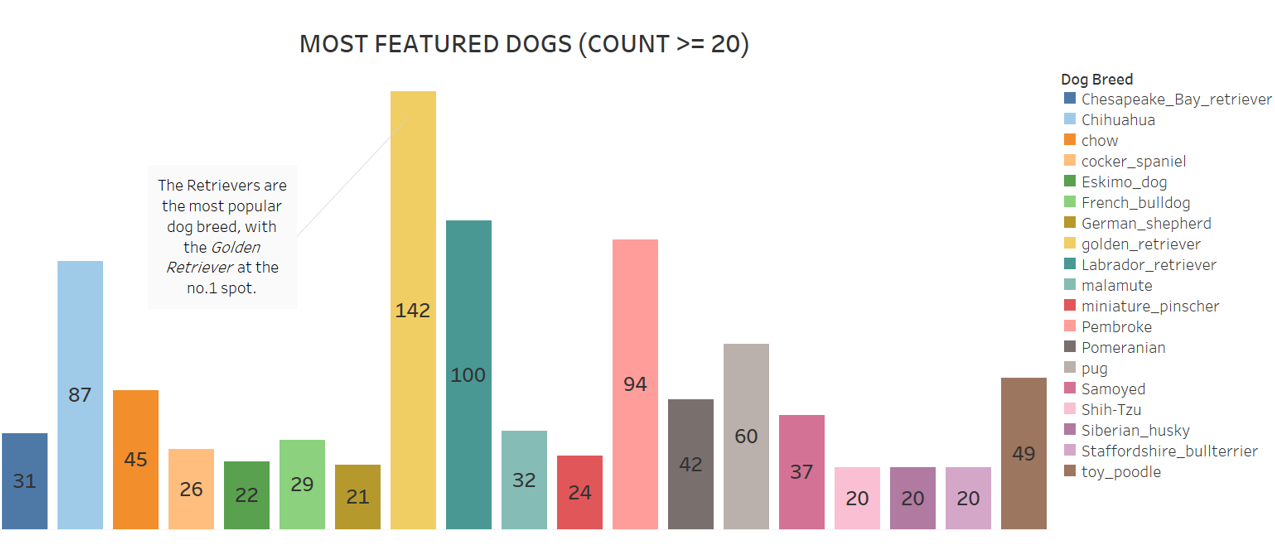

The visuals below shows the average rating, tweet likes and retweets for each dog breed. We can see there is a cluster of the ratings around 10-12. The diagrams also point to evidence that high dog ratings does not equate to high likes or retweets for a dog post.

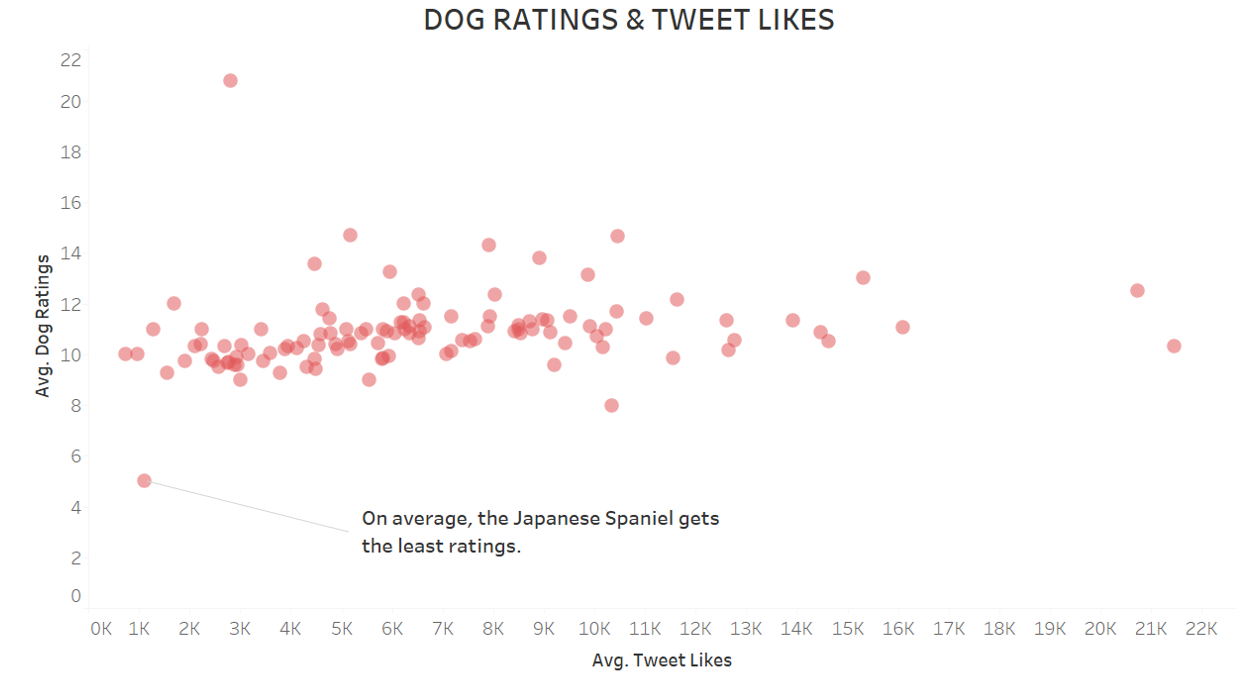

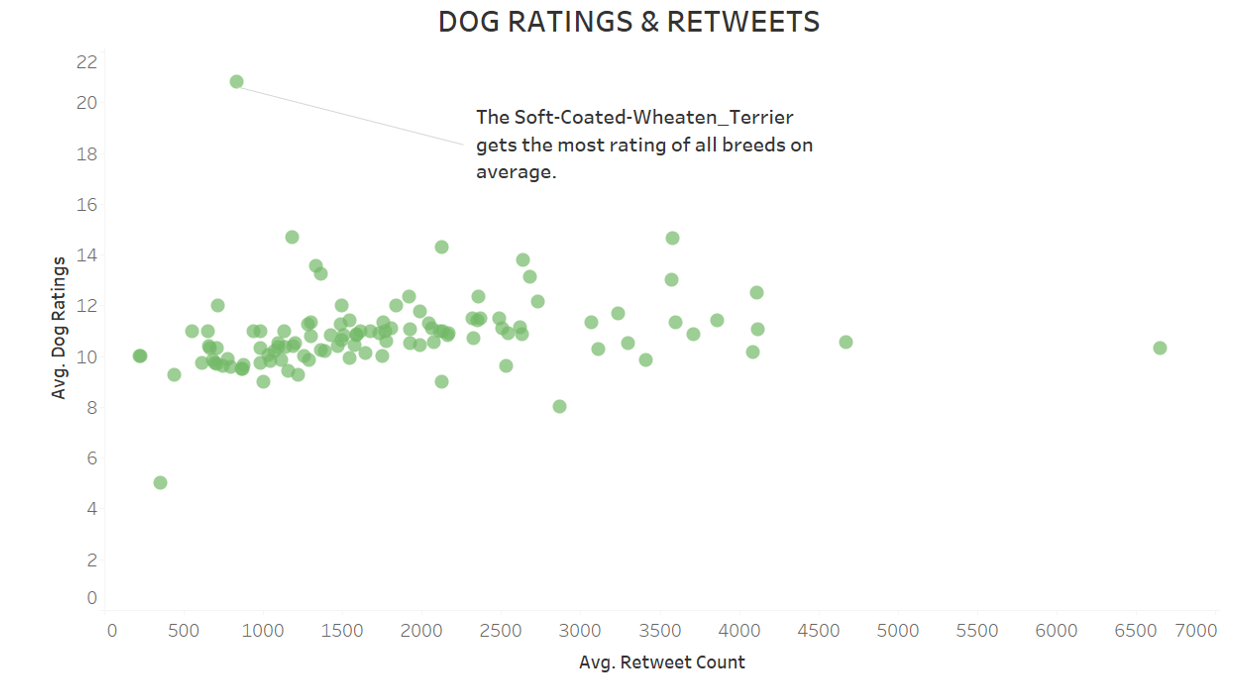